In [1]:
import pandas as pd

In [2]:
text_data = pd.read_csv('../../datasets/av_free_course/tweets.csv', encoding = 'ISO-8859-1')

In [3]:
text_data.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [4]:
# Generating word frequency
word_list = []

for word in text_data.text.str.split():
    word_list.extend(word)

word_freq = pd.Series(word_list).value_counts()
print(word_freq)

RT                         11053
to                          7650
is                          5152
in                          4491
the                         4331
                           ...  
#News                          1
notes|                         1
https://t.co/ECl4oIzdHA        1
https://t.co/9MjFtLtCtR        1
https://t.co/hwgqjbqgvG        1
Length: 19601, dtype: int64


In [5]:
# Generating Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

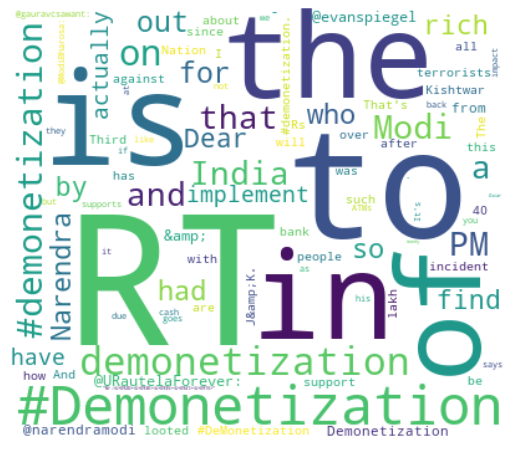

In [6]:
wc = WordCloud(width=400, height=350, max_words=100, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Text Cleaning

In [7]:
# Lower case
text = text_data.text.str.lower()
text.head()

0    rt @rssurjewala: critical question: was paytm ...
1    rt @hemant_80: did you vote on #demonetization...
2    rt @roshankar: former finsec, rbi dy governor,...
3    rt @ani_news: gurugram (haryana): post office ...
4    rt @satishacharya: reddy wedding! @mail_today ...
Name: text, dtype: object

In [8]:
# removing 'rt'
import re
import unicodedata

cleaned_tweets = []
for tweet in text:
    tweet = re.sub('rt ','', str(tweet)) # Removing RT
    tweet = re.sub(r'@\w+:\s|@\w+', '', tweet) # Removing @mentions
    tweet = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});').sub('', tweet) # Removing HTML Tags
    tweet = re.sub(r'http\S+|https?://\S+|www\.\S+', '', tweet) # Removing URLs
    tweet = "".join(char for char in tweet if unicodedata.category(char)[0]!="C") # removing Control Characters
    tweet = re.sub('[(\U0001F600-\U0001F92F|\U0001F300-\U0001F5FF|\U0001F680-\U0001F6FF|\U0001F190-\U0001F1FF|\U00002702-\U000027B0|\U0001F926-\U0001FA9F|\u200d|\u2640-\u2642|\u2600-\u2B55|\u23cf|\u23e9|\u231a|\ufe0f)]+','',tweet) #Removing Emojis
    tweet = re.sub(r'[^\w\s]','', str(tweet)) # Removing Punctuations
    cleaned_tweets.append(tweet)
cleaned_tweets

['critical question was paytm informed about demonetization edict by pm its clearly fishy and requires full disclosure ',
 'did you vote on demonetization on modi survey app',
 'former finsec rbi dy governor cbdt chair  harvard professor lambaste demonetizationif not for aam aadmi listen to th',
 'gurugram haryana post office employees provide cash exchange to patients in hospitals demonetization ',
 'reddy wedding  cartoon demonetization reddywedding ',
 'indias demonetization blackmoney a symptom not the disease  via ',
 'rs 40 lakh looted from a bank in kishtwar in jk third such incident since demonetization thats how terrorists have',
 'calling all nationalists to joinwalk for corruptionfreeindia and spread the benefits of demonetization among the mas',
 'many opposition leaders are with  on the demonetization and respect their decisionbut suppooppositio',
 'national reform now destroyed even the essence of sagan such instances urge giving demonetization a second though ',
 'many o

In [9]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop = set(stopwords.words('english'))

tweet_wo_sw = []

# Removing Stop Words
for tweet in cleaned_tweets:
    tweet_tokens = word_tokenize(tweet)
    tokens_without_sw = [word for word in tweet_tokens if not word in stop]
    tweet = ' '.join(tokens_without_sw)
    tweet_wo_sw.append(tweet)
tweet_wo_sw

['critical question paytm informed demonetization edict pm clearly fishy requires full disclosure',
 'vote demonetization modi survey app',
 'former finsec rbi dy governor cbdt chair harvard professor lambaste demonetizationif aam aadmi listen th',
 'gurugram haryana post office employees provide cash exchange patients hospitals demonetization',
 'reddy wedding cartoon demonetization reddywedding',
 'indias demonetization blackmoney symptom disease via',
 'rs 40 lakh looted bank kishtwar jk third incident since demonetization thats terrorists',
 'calling nationalists joinwalk corruptionfreeindia spread benefits demonetization among mas',
 'many opposition leaders demonetization respect decisionbut suppooppositio',
 'national reform destroyed even essence sagan instances urge giving demonetization second though',
 'many opposition leaders demonetization respect decisionbut suppoopposition bcoz party',
 'question narendra modi app pm taking feedback people suppohis demonetization strateg

In [13]:
# Generating word frequency
word_list = []

for tweet in tweet_wo_sw:
    tweet_tokens = word_tokenize(tweet)
    word_list.extend(tweet_tokens)

word_freq = pd.Series(word_list).value_counts()
print(word_freq)

demonetization    13745
modi               2744
pm                 2722
india              2714
narendra           1566
                  ...  
housewives            1
wields                1
influence             1
57                    1
admin                 1
Length: 9539, dtype: int64


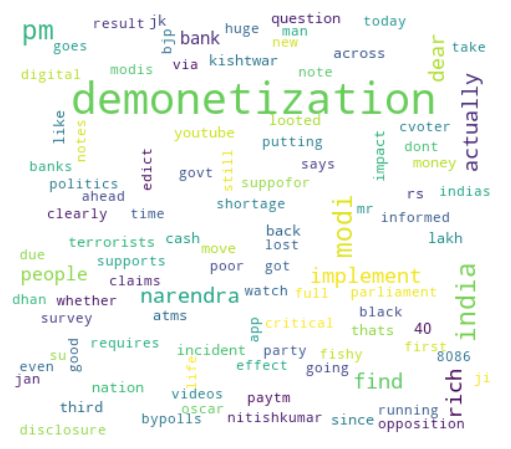

In [14]:
wc = WordCloud(width=400, height=350, max_words=100, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()